# Generate images using a pretrained Model

In [1]:
import os

import torch
import matplotlib.pyplot as plt

from datetime import datetime
from torchvision.utils import save_image

from pl_module import PL_Module
from model import Generator, Critic


## Hyperparameters

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nz = 100
ngf = 64
ndf = 64

weights_path = "./data/weights/wgan_28.weights.pth"

## Utility functions

In [3]:
def load_model(path, device):
    # create module
    generator = Generator(nz=nz, ngf=ngf)
    critic = Critic(ndf=ndf)

    module = PL_Module(generator, critic, None, None, None, nz, 16)

    # load checkpoint
    checkpoint = torch.load(path, map_location=device)
    state_dict = checkpoint['state_dict']
    
    # load pretrained weights into generator model
    module.load_state_dict(state_dict)
    
    generator = module.generator

    # set generator to evaluation mode
    generator.eval().to(device)

    return generator

def generate_image(generator, nz, device):
    with torch.no_grad():
        # noise input vector
        z = torch.randn((1, nz, 1, 1), device=device)

        generated_image = generator(z)

    return generated_image

## Initialization

In [4]:
generator = load_model(weights_path, device)

C:\Users\benjamin\AppData\Local\Temp\ipykernel_17984\2727087674.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=device)


## Image generation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.996346..0.9886835].


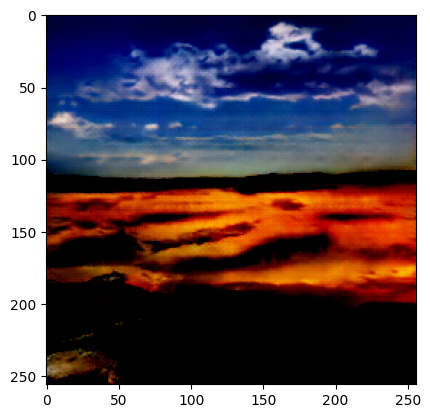

In [29]:
# generate images using the generator model (you can execute over and over to generate different images)
generated_image = generate_image(generator, nz, device)

plt.imshow(generated_image[0].permute(1, 2, 0).cpu())

## Save current image

In [10]:
# save the current image in the ./data/output folder using the timestamp as filename
output_path = f"./data/output/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

save_image(generated_image, output_path)